In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1 , inplace = True)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
data =pd.get_dummies(df , columns = ["Geography" , "Gender"] , drop_first = True)

In [7]:
train , test = np.split(data.sample(frac = 1) , [int(0.8*len(df))])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
def pre(dataframe):
    x = dataframe.drop("Exited" , axis = 1)
    y = dataframe["Exited"]
    
    sc = StandardScaler()
    
    sc.fit_transform(x , y)
    
    return x , y

In [10]:
X_train , Y_train = pre(train)
X_test , Y_test = pre(test)

In [11]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8120,523,45,5,0.00,2,1,1,121428.20,0,0,1
3687,668,32,2,0.00,2,1,1,40652.33,0,0,0
6739,509,55,8,132387.91,2,1,1,170360.11,0,0,1
2544,668,34,5,80242.37,2,0,0,56780.97,1,0,1
4142,637,63,5,0.00,1,1,0,28092.77,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4756,785,39,1,130147.98,1,1,0,163798.41,0,0,0
4508,599,41,1,0.00,2,1,0,96069.82,0,0,0
2321,545,45,6,93796.42,2,1,1,162321.26,1,0,1
8958,573,52,8,0.00,2,0,1,178229.04,0,0,1


In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(11 , activation = "relu" , input_dim = 11))
model.add(Dense(11 , activation = "relu" , input_dim = 11))
model.add(Dense(1 , activation = "sigmoid"))

2023-02-07 16:18:31.075724: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss = "binary_crossentropy" , optimizer = "Adam" , metrics = ["accuracy"])

In [16]:
hitstory = model.fit(X_train , Y_train , epochs = 100 , validation_split = 0.2)

2023-02-07 16:18:31.360931: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 957.1284 - accuracy: 0.6761 - val_loss: 72.6057 - val_accuracy: 0.5606
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 48.6003 - accuracy: 0.6702 - val_loss: 26.7021 - val_accuracy: 0.6319
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 34.1804 - accuracy: 0.6773 - val_loss: 58.0723 - val_accuracy: 0.6875
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 27.7873 - accuracy: 0.6781 - val_loss: 33.0275 - val_accuracy: 0.8000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 25.6282 - accuracy: 0.6662 - val_loss: 39.8735 - val_accuracy: 0.7931
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 20.1869 - accuracy: 0.6748 - val_loss: 14.3127 - val_accuracy: 0.6963
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 21.0264 - accuracy: 0.6702 - val_loss: 29.4985 - val_a

In [17]:
y_log = model.predict(X_test)

In [18]:
y_pred = np.where(y_log > 0.5 , 1 , 0)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print(accuracy_score(Y_test , y_pred))

0.7975


In [21]:
import matplotlib.pyplot as plt

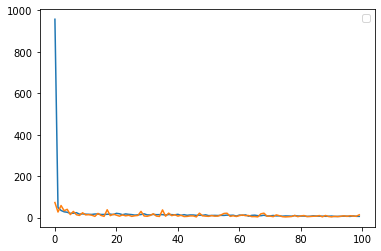

In [22]:
plt.plot(hitstory.history["loss"])
plt.plot(hitstory.history["val_loss"])
plt.legend()

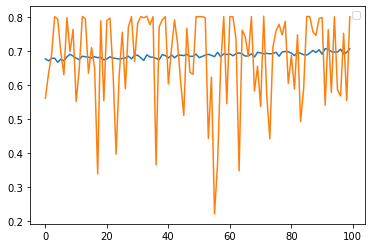

In [23]:
plt.plot(hitstory.history["accuracy"])
plt.plot(hitstory.history["val_accuracy"])
plt.legend()